# Compression testing for MDF cores

In [5]:
### DEPENDENCIES
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [6]:
def makeDataframe(csvPath):
    df = pd.read_csv(csvPath)
    df = df[1:]
    return df

In [7]:
def graphDataframe(df):
    
    ext = df['Extension']
    load = df['Load']

    ext = [float(x) for x in ext]
    load = [float(y) for y in load]
    fig = plt.figure()
    
    fig.set_size_inches(10,10)  # OR
    plt.scatter(ext, load)

    fig.suptitle('Extension vs. Load', fontsize=20)
    plt.xlabel('Compressive Extension (mm)', fontsize=16)
    plt.ylabel('Compressive Load (N)', fontsize=16)
    # fig.savefig('time_compressiveLoad_4pointTest.jpg')

    plt.show()

def toFloat(x):
    return float(x)
    
def opposite(x):
    return -float(x)

def rotateGraph(df):
    """Returns opposites of values so graphs are correct with values"""    
    df['Extension'] = df['Extension'].apply(opposite)
    df['Load'] = df['Load'].apply(opposite)

    return df
    
# df = makeDataframe('./data/CompressionCore/Core25-15.csv')
# df = rotateGraph(df)
# seaborn(df)
# graphDataframe(df)

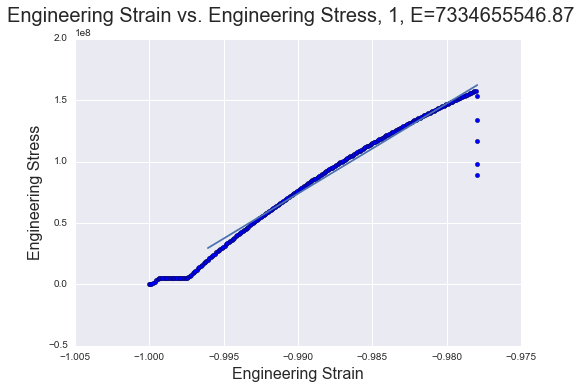

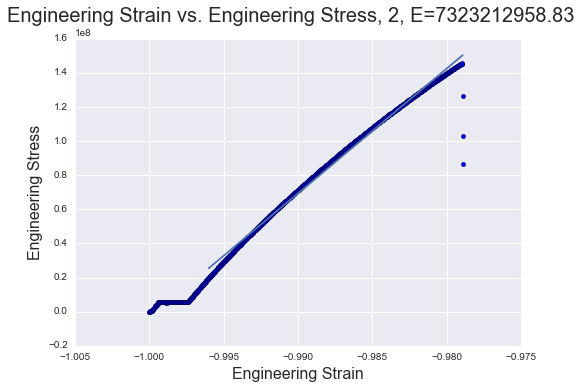

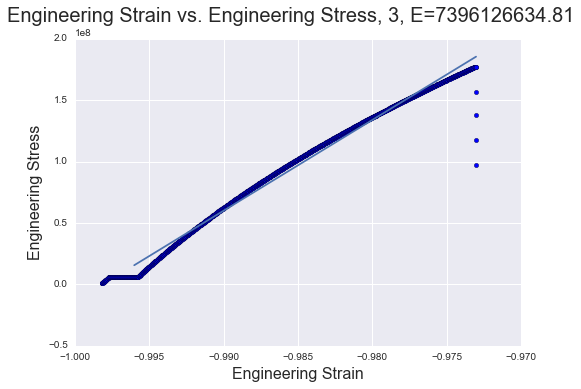

{'1': 7334655546.8701591, '3': 7396126634.8090687, '2': 7323212958.8255024}
7351331713.5


In [28]:
def engineeringStrain(extensions, length):
    epsilon = []
    for extension in extensions:
        epsilon.append((extension - length)/length)
    return epsilon

def engineeringStress(loads, area):
    sigma = []
    for load in loads:
        sigma.append(load/area)
    return sigma

def graphStressStrain(df, length, area, sample, estimate1=-.98, estimate2=-.996):
    
    extensions = df['Extension']
    loads = df['Load']

    extensions = [float(x) for x in extensions]
    loads = [float(y) for y in loads]
    
    strains = engineeringStrain(extensions, length)
    stresses = engineeringStress(loads, area)
    
    chopPoint1 = chopData(strains, estimate1)
    chopPoint2 = chopDataReverse(strains, estimate2)

    modStrains = strains[chopPoint2:chopPoint1]
    modStresses = stresses[chopPoint2:chopPoint1]
    modStrains = np.array(modStrains)
    modStresses = np.array(modStresses)
    
    fig, ax = plt.subplots()
    fit = np.polyfit(modStrains, modStresses, deg=1)
    compressionModulus = fit[0]
    ax.plot(modStrains, fit[0]*modStrains + fit[1])
    ax.scatter(strains, stresses)

    fig.suptitle('Engineering Strain vs. Engineering Stress, {}, E={}'.format(sample, compressionModulus), fontsize=20)
    plt.xlabel('Engineering Strain', fontsize=16)
    plt.ylabel('Engineering Stress', fontsize=16)

    plt.show()
    return compressionModulus

def chopData(dataList, estimate):
    for data in dataList[::-1]:
        if data < estimate:
            continue
        else:
            return dataList.index(data)

def chopDataReverse(dataList, estimate):
    for data in dataList[::-1]:
        if data > estimate:
            continue
        else:
            return dataList.index(data)
    
slength = 177.8
sarea = 16.38 / 1000000
moduli = {}
s1 = makeDataframe('./data/Tensile/Tensile1.csv')
moduli['1'] = graphStressStrain(s1,slength, sarea, '1')
s2 = makeDataframe('./data/Tensile/Tensile2.csv')
moduli['2'] = graphStressStrain(s2,slength, sarea, '2')
s3 = makeDataframe('./data/Tensile/Tensile3.csv')
moduli['3'] = graphStressStrain(s3,slength, sarea, '3')
print moduli
avgModulus = sum(moduli.values())/len(moduli)
print avgModulus

In [9]:
print 7*25.4

177.8
